In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import spacy
import gensim
import seaborn as sns

C:\Users\jnske\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
games = pd.read_csv('./data/games.csv', header = None, names = ['app_type', 'game_id', 'game'])
games.head()

,app_type,game_id,game
0,app,883710,RESIDENT EVIL 2 / BIOHAZARD RE:2
1,app,859580,Imperator: Rome
2,app,976310,Mortal Kombat 11
3,app,730,Counter-Strike: Global Offensive
4,app,632360,Risk of Rain 2


In [3]:
games.shape

(23377, 3)

In [4]:
reviews = pd.read_csv('./data/reviews.csv', header = None, names = ['game_id', 'helpful_count', 'funny_count', 'username', 
                                                                    'user_owned_games', 'user_review_count', 'recommended', 
                                                                    'hours_played', 'review_date', 'text'])
reviews.head(20)

,game_id,helpful_count,funny_count,username,user_owned_games,user_review_count,recommended,hours_played,review_date,text
0,1000130,2,0,76561198006260288,528,87,1,1.1,"January 19, 2019","A ""fast"" Tower Defense to keep you on your toe..."
1,1000130,2,0,76561198006260288,528,87,1,1.1,"January 19, 2019","A ""fast"" Tower Defense to keep you on your toe..."
2,1000130,2,0,76561198006260288,528,87,1,1.1,"January 19, 2019","A ""fast"" Tower Defense to keep you on your toe..."
3,1000380,2,0,76561198006260288,528,87,1,1.1,"January 19, 2019","A ""fast"" Tower Defense to keep you on your toe..."
4,1000380,2,0,76561198006260288,528,87,1,1.1,"January 19, 2019","A ""fast"" Tower Defense to keep you on your toe..."
5,1000790,2,0,76561198006260288,528,87,1,1.1,"January 19, 2019","A ""fast"" Tower Defense to keep you on your toe..."
6,1000790,2,0,76561198006260288,528,87,1,1.1,"January 19, 2019","A ""fast"" Tower Defense to keep you on your toe..."
7,1000810,2,0,76561198006260288,528,87,1,1.1,"January 19, 2019","A ""fast"" Tower Defense to keep you on your toe..."
8,1000810,2,0,76561198006260288,528,87,1,1.1,"January 19, 2019","A ""fast"" Tower Defense to keep you on your toe..."
9,1000830,0,0,ArngrimEinherjar,241,26,1,0.1,"April 26, 2019","Ho ho ho, ganging up!"


In [5]:
# reviews.funny_count.value_counts()

In [6]:
steam_df = games.merge(reviews, how = "inner", on = 'game_id')
steam_df.head()

,app_type,game_id,game,helpful_count,funny_count,username,user_owned_games,user_review_count,recommended,hours_played,review_date,text
0,app,859580,Imperator: Rome,0,0,76561198007417753,180,2,-1,8.5,"April 29, 2019",The game feels more like a demo than a full ga...
1,app,859580,Imperator: Rome,4,0,76561198060604468,157,1,-1,4.2,"April 29, 2019","About 3 hours worth of playability, doesn't ho..."
2,app,859580,Imperator: Rome,0,0,76561198040368619,87,11,1,1.2,"April 29, 2019","My first Roman Empire program was Pax Romana, ..."
3,app,859580,Imperator: Rome,4,0,76561197995444569,103,1,-1,2.3,"April 29, 2019","When Sea of Thieves was released, many complai..."
4,app,859580,Imperator: Rome,1,0,atomica,391,8,1,15.4,"April 29, 2019",This may end up being my favorite Paradox game...


In [7]:
steam_df = steam_df.drop(['app_type', 'game_id'], axis = 1)

In [8]:
steam_df.head()

,game,helpful_count,funny_count,username,user_owned_games,user_review_count,recommended,hours_played,review_date,text
0,Imperator: Rome,0,0,76561198007417753,180,2,-1,8.5,"April 29, 2019",The game feels more like a demo than a full ga...
1,Imperator: Rome,4,0,76561198060604468,157,1,-1,4.2,"April 29, 2019","About 3 hours worth of playability, doesn't ho..."
2,Imperator: Rome,0,0,76561198040368619,87,11,1,1.2,"April 29, 2019","My first Roman Empire program was Pax Romana, ..."
3,Imperator: Rome,4,0,76561197995444569,103,1,-1,2.3,"April 29, 2019","When Sea of Thieves was released, many complai..."
4,Imperator: Rome,1,0,atomica,391,8,1,15.4,"April 29, 2019",This may end up being my favorite Paradox game...


In [9]:
# pd.options.display.max_colwidth = 500
# steam_df[['game', 'text']].loc[steam_df['funny_count'] == steam_df['funny_count'].max()]

In [10]:
# steam_df[['game', 'text']].loc[steam_df['helpful_count'] == steam_df['helpful_count'].max()]

In [11]:
# len(steam_df.game.value_counts())

In [12]:
top_games = steam_df.game.value_counts().head(10).to_dict()
top_games = list(top_games.keys())
top_games

["Tom Clancy's Rainbow Six® Siege",
 'Borderlands 2',
 'Subnautica',
 'Left 4 Dead 2',
 "PLAYERUNKNOWN'S BATTLEGROUNDS",
 'Z1 Battle Royale',
 'Starbound',
 'Fallout 4',
 'The Forest',
 'Mount &amp; Blade: Warband']

In [13]:
steam_df = steam_df[steam_df.game.isin(top_games)]

In [14]:
steam_df.shape

(464426, 10)

In [15]:
steam_df.review_date = pd.to_datetime(steam_df.review_date)

In [16]:
steam_df.dtypes

game                         object
helpful_count                 int64
funny_count                   int64
username                     object
user_owned_games              int64
user_review_count             int64
recommended                   int64
hours_played                float64
review_date          datetime64[ns]
text                         object
dtype: object

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\John\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
stop_words = stopwords.words('english')
steam_df['text_tok'] = steam_df['text'].apply(lambda x: ' '.join(w for w in str(x).split() if w not in stop_words))

In [48]:
# steam_df.head()
steam_df['text_tok'] = steam_df['text_tok'].astype(str)
# steam_df['text_tok'] = steam_df['text_tok'].str.lower()

In [54]:
import re
steam_df['text_tok'] = steam_df['text_tok'].replace('r[^a-z\s]', '')

In [55]:
steam_df['text_tok'] = steam_df['text_tok'].str.lower()

In [56]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

# steam_df['text_tok'] = steam_df['text_tok'].apply(tokenizer.tokenize)  #MemoryError


steam_df['text_tok'] = steam_df['text_tok'].apply(word_tokenize)

In [57]:
steam_df.to_csv('steam_df', sep = ',')

### Start from here with saved CSV

In [2]:
steam_df = pd.read_csv('steam_df')

In [3]:
steam_df = steam_df.drop('Unnamed: 0', axis = 1)
steam_df.head(5)

,game,helpful_count,funny_count,username,user_owned_games,user_review_count,recommended,hours_played,review_date,text,text_tok
0,Tom Clancy's Rainbow Six® Siege,0,0,YatoAkito,24,16,1,174.8,2019-04-29,Yes,['yes']
1,Tom Clancy's Rainbow Six® Siege,0,0,LucasXru,236,7,1,403.1,2019-04-29,Best tactical shooter there is on the market a...,"['best', 'tactical', 'shooter', 'market', 'tim..."
2,Tom Clancy's Rainbow Six® Siege,0,0,CommitGunHead,61,6,1,162.6,2019-04-29,"Great game, I like rezing a teammate and then ...","['great', 'game', ',', 'i', 'like', 'rezing', ..."
3,Tom Clancy's Rainbow Six® Siege,0,0,gunsandvanity,34,7,1,18.6,2019-04-29,10/10 WOULD FUSE THE HOSTAGE AGAIN,"['10/10', 'would', 'fuse', 'the', 'hostage', '..."
4,Tom Clancy's Rainbow Six® Siege,0,0,76561198261548039,7,1,1,38.2,2019-04-29,very good game,"['good', 'game']"


#### Vectorization and train_test_split

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from collections import Counter

# Counter(np.concatenate(steam_df.text_tok)).most_common(10)

In [5]:
steam_df.text_tok

0                                                   ['yes']
1         ['best', 'tactical', 'shooter', 'market', 'tim...
2         ['great', 'game', ',', 'i', 'like', 'rezing', ...
3         ['10/10', 'would', 'fuse', 'the', 'hostage', '...
4                                          ['good', 'game']
5         ['very', 'nice', 'game', '.', 'play', '.', 'ye...
6                                  ['not', 'for', 'nubbbs']
7         ['this', 'one', 'best', 'games', 'ever', 'i', ...
8                                                    ['：）']
9         ['the', 'game', 'great', ',', 'guns', 'feel', ...
10        ['i', "'ve", 'really', 'enjoyed', 'game', 'buy...
11        ['this', 'game', 'lot', 'like', '50', 'cent', ...
12        ['ran', 'by', 'probly', 'the', 'same', 'sjws',...
13        ['as', 'long', 'buy', 'starter', 'edition', 'g...
14        ['great', 'game', 'bugs', 'better', 'friends',...
15                                  ['best', 'fps', 'game']
16                                      

In [5]:
steam_df['game'].value_counts()

Tom Clancy's Rainbow Six® Siege    87984
Borderlands 2                      57656
Subnautica                         52936
Left 4 Dead 2                      51557
PLAYERUNKNOWN'S BATTLEGROUNDS      40918
Z1 Battle Royale                   39041
Starbound                          34481
Fallout 4                          34257
The Forest                         33195
Mount &amp; Blade: Warband         32401
Name: game, dtype: int64

In [6]:
steam_df['text'].isna().sum()

220

In [7]:
steam_df.shape

(464426, 11)

In [8]:
steam_df = steam_df.dropna()

In [9]:
steam_df.shape

(464206, 11)

Text(0.5, 0, 'Review Percentage')

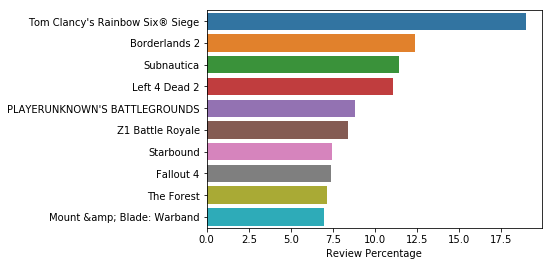

In [36]:
game_PCT = (steam_df.game.value_counts(ascending=False, sort=True, normalize=True)*100).head(10).reset_index()
sns.barplot(x='game', y='index', data=game_PCT)
plt.ylabel('', fontsize = 20)
plt.xlabel('Review Percentage')

#### Downsampling & TFIDF

In [10]:
from sklearn.utils import resample

In [11]:
top_games = steam_df.game.value_counts().head(10).to_dict()
top_games = list(top_games.keys())
top_games

["Tom Clancy's Rainbow Six® Siege",
 'Borderlands 2',
 'Subnautica',
 'Left 4 Dead 2',
 "PLAYERUNKNOWN'S BATTLEGROUNDS",
 'Z1 Battle Royale',
 'Starbound',
 'Fallout 4',
 'The Forest',
 'Mount &amp; Blade: Warband']

In [12]:
downsample_df = pd.DataFrame()
for game in top_games:
    sample = resample(steam_df.loc[steam_df['game'] == game], n_samples = steam_df['game'].value_counts()[9], random_state = 42)
    downsample_df = downsample_df.append(sample)
    print (game)

Tom Clancy's Rainbow Six® Siege
Borderlands 2
Subnautica
Left 4 Dead 2
PLAYERUNKNOWN'S BATTLEGROUNDS
Z1 Battle Royale
Starbound
Fallout 4
The Forest
Mount &amp; Blade: Warband


In [14]:
downsample_df['game'].value_counts()

Borderlands 2                      32368
Fallout 4                          32368
The Forest                         32368
Z1 Battle Royale                   32368
Subnautica                         32368
Left 4 Dead 2                      32368
Tom Clancy's Rainbow Six® Siege    32368
Starbound                          32368
PLAYERUNKNOWN'S BATTLEGROUNDS      32368
Mount &amp; Blade: Warband         32368
Name: game, dtype: int64

In [15]:
downsample_df.head()

,Unnamed: 0,game,helpful_count,funny_count,username,user_owned_games,user_review_count,recommended,hours_played,review_date,text,text_tok
15795,47194,Tom Clancy's Rainbow Six® Siege,0,0,Exalindor,86,5,1,687.6,2018-09-11,It pleases me.,"['it', 'pleases', 'me', '.']"
860,32259,Tom Clancy's Rainbow Six® Siege,0,0,JaydenTDM123,54,49,1,11.2,2018-12-11,Meh...,"['meh', '...']"
76820,108219,Tom Clancy's Rainbow Six® Siege,0,0,76561198055515879,51,3,1,399.8,2016-08-12,fun game its like if CSGO + Battlefield had a ...,"['fun', 'game', 'like', 'csgo', '+', 'battlefi..."
54886,86285,Tom Clancy's Rainbow Six® Siege,0,0,weffles101,492,29,-1,872.1,2017-09-21,Overall not a bad game but the nerf/buff opera...,"['overall', 'bad', 'game', 'nerf/buff', 'opera..."
6265,37664,Tom Clancy's Rainbow Six® Siege,0,0,The47thassasin,20,2,1,117.0,2018-11-22,"By far, the best multiplayer game I have ever ...","['by', 'far', ',', 'best', 'multiplayer', 'gam..."


In [43]:
downsample_df.text.value_counts()[1:10]

good          837
.             482
Good game     455
10/10         433
great game    413
Great game    389
nice game     346
nice          334
yes           325
Name: text, dtype: int64

In [18]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = downsample_df["text_tok"].tolist()
list_labels = downsample_df["game"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=42)

In [17]:
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

#### Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
#                          multi_class='multinomial', n_jobs=-1, random_state=42)
# clf.fit(X_train_counts, y_train)

# y_predicted_counts = clf.predict(X_test_counts)

In [ ]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# def get_metrics(y_test, y_predicted):  
#     # true positives / (true positives+false positives)
#     precision = precision_score(y_test, y_predicted, pos_label=None,
#                                     average='weighted')             
#     # true positives / (true positives + false negatives)
#     recall = recall_score(y_test, y_predicted, pos_label=None,
#                               average='weighted')
    
#     # harmonic mean of precision and recall
#     f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
#     # true positives + true negatives/ total
#     accuracy = accuracy_score(y_test, y_predicted)
#     return accuracy, precision, recall, f1

# accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
# print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

In [ ]:
#from gensim.test.utils import common_texts, get_tmpfile
#from gensim.models import Word2Vec
#path = get_tmpfile("word2vec.model")

In [ ]:
#model = Word2Vec(list_corpus, size=100, window=5, min_count=1, workers=4)
#model.save("word2vec.model")

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf = TfidfVectorizer(ngram_range = (2, 3), lowercase = False)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(X_train_tfidf, y_train)

y_pred = log.predict(X_test_tfidf)

E:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [52]:
print('Logisitc Regression:')
print("accuracy: ")
print(accuracy_score(y_test, y_pred))

print("F1 score: ")
print(f1_score(y_test, y_pred, pos_label = None, average = 'weighted'))

print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

Logisitc Regression:
accuracy: 
0.7243714404778442
F1 score: 
0.7304066121861544
confusion matrix: 
[[7766  127  564  507 1170  232  349  207  298  196]
 [ 358 9165  181  234  866  149  253  101  177  182]
 [ 699   67 7541  385 1587  145  243  237  367  304]
 [ 482   82  317 8760  899  176  267   93  187  160]
 [ 238   58  310  166 9420   88  133  118  305  664]
 [ 339   65  270  273  745 8949  448  167  151  188]
 [ 364   69  201  244  646  300 8941  412  169  198]
 [ 338   58  357  179  910  142  619 8360  187  207]
 [ 507   73  536  336 1931  177  295  178 6929  567]
 [ 288   69  369  169 2242  120  180  195  342 7605]]


In [53]:
from sklearn.metrics import classification_report
print('Logistic Regression Classificaion Report:')
print(classification_report(y_test, y_pred))

Logistic Regression Classificaion Report:
                                 precision    recall  f1-score   support

                  Borderlands 2       0.68      0.68      0.68     11416
                      Fallout 4       0.93      0.79      0.85     11666
                  Left 4 Dead 2       0.71      0.65      0.68     11575
     Mount &amp; Blade: Warband       0.78      0.77      0.77     11423
  PLAYERUNKNOWN'S BATTLEGROUNDS       0.46      0.82      0.59     11500
                      Starbound       0.85      0.77      0.81     11595
                     Subnautica       0.76      0.77      0.77     11544
                     The Forest       0.83      0.74      0.78     11357
Tom Clancy's Rainbow Six® Siege       0.76      0.60      0.67     11529
               Z1 Battle Royale       0.74      0.66      0.70     11579

                      micro avg       0.72      0.72      0.72    115184
                      macro avg       0.75      0.72      0.73    115184
       

#### Upsampling and TFIDF

In [15]:
upsample_df = pd.DataFrame()
for game in top_games:
    sample = resample(steam_df.loc[steam_df['game'] == game], n_samples = steam_df['game'].value_counts()[1], random_state = 42)
    upsample_df = upsample_df.append(sample)
    print (game)

Tom Clancy's Rainbow Six® Siege
Borderlands 2
Subnautica
Left 4 Dead 2
PLAYERUNKNOWN'S BATTLEGROUNDS
Z1 Battle Royale
Starbound
Fallout 4
The Forest
Mount &amp; Blade: Warband


In [20]:
list_corpus = upsample_df["text_tok"].tolist()
list_labels = upsample_df["game"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=42)

In [21]:
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [22]:
tfidf = TfidfVectorizer(ngram_range = (2, 3), lowercase = False)
X_train_tfidf_up = tfidf.fit_transform(X_train)
X_test_tfidf_up = tfidf.transform(X_test)

#### Logistic Regression

In [38]:
log = LogisticRegression()

log.fit(X_train_tfidf_up, y_train)

y_pred = log.predict(X_test_tfidf_up)

E:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [50]:
print("Logistic Regression")
print("accuracy: ")
print(accuracy_score(y_test, y_pred))

print("F1 score: ")
print(f1_score(y_test, y_pred, pos_label = None, average = 'weighted'))

print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

Logistic Regression
accuracy: 
0.7243714404778442
F1 score: 
0.7304066121861544
confusion matrix: 
[[7766  127  564  507 1170  232  349  207  298  196]
 [ 358 9165  181  234  866  149  253  101  177  182]
 [ 699   67 7541  385 1587  145  243  237  367  304]
 [ 482   82  317 8760  899  176  267   93  187  160]
 [ 238   58  310  166 9420   88  133  118  305  664]
 [ 339   65  270  273  745 8949  448  167  151  188]
 [ 364   69  201  244  646  300 8941  412  169  198]
 [ 338   58  357  179  910  142  619 8360  187  207]
 [ 507   73  536  336 1931  177  295  178 6929  567]
 [ 288   69  369  169 2242  120  180  195  342 7605]]


In [51]:
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
                                 precision    recall  f1-score   support

                  Borderlands 2       0.68      0.68      0.68     11416
                      Fallout 4       0.93      0.79      0.85     11666
                  Left 4 Dead 2       0.71      0.65      0.68     11575
     Mount &amp; Blade: Warband       0.78      0.77      0.77     11423
  PLAYERUNKNOWN'S BATTLEGROUNDS       0.46      0.82      0.59     11500
                      Starbound       0.85      0.77      0.81     11595
                     Subnautica       0.76      0.77      0.77     11544
                     The Forest       0.83      0.74      0.78     11357
Tom Clancy's Rainbow Six® Siege       0.76      0.60      0.67     11529
               Z1 Battle Royale       0.74      0.66      0.70     11579

                      micro avg       0.72      0.72      0.72    115184
                      macro avg       0.75      0.72      0.73    115184
      

#### Now repeating using an Linear SVC classifier

In [24]:
from sklearn.svm import SVC, LinearSVC

SVC = SVC()
LSVC = LinearSVC()

In [25]:
LSVC.fit(X_train_tfidf_up, y_train)
y_pred = LSVC.predict(X_test_tfidf_up)
print('LSVC Classification:')
print(classification_report(y_test, y_pred))

LSVC Classification:


NameError: name 'classification_report' is not defined

In [27]:
print("Linear SVC:")
print("accuracy: ")
print(accuracy_score(y_test, y_pred))

print("F1 score: ")
print(f1_score(y_test, y_pred, pos_label = None, average = 'weighted'))

print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

Linear SVC:
accuracy: 
0.7570322266981525
F1 score: 
0.7630920478883497
confusion matrix: 
[[8097  153  566  367  147  211  263  178  290 1144]
 [ 293 9672  177  169  117  103  153   75  153  754]
 [ 586   96 7998  288  271  154  161  211  312 1498]
 [ 470   91  297 9023  102  124  176   94  178  868]
 [ 215   73  295  116 8281   75   95  104  292 1954]
 [ 310   58  243  182   77 9408  293  165  137  722]
 [ 339   89  209  183  143  268 9199  360  172  582]
 [ 299   64  324  130  122  121  428 8861  149  859]
 [ 497  102  547  262  524  162  209  161 7306 1759]
 [ 302  101  337  102  711  103  115  159  296 9353]]


In [26]:
from sklearn.metrics import classification_report

print('LSVC Classification:')
print(classification_report(y_test, y_pred))

LSVC Classification:
                                 precision    recall  f1-score   support

                  Borderlands 2       0.71      0.71      0.71     11416
                      Fallout 4       0.92      0.83      0.87     11666
                  Left 4 Dead 2       0.73      0.69      0.71     11575
     Mount &amp; Blade: Warband       0.83      0.79      0.81     11423
  PLAYERUNKNOWN'S BATTLEGROUNDS       0.79      0.72      0.75     11500
                      Starbound       0.88      0.81      0.84     11595
                     Subnautica       0.83      0.80      0.81     11544
                     The Forest       0.85      0.78      0.82     11357
Tom Clancy's Rainbow Six® Siege       0.79      0.63      0.70     11529
               Z1 Battle Royale       0.48      0.81      0.60     11579

                      micro avg       0.76      0.76      0.76    115184
                      macro avg       0.78      0.76      0.76    115184
                   weighted 

#### Regular SVC Classifier

In [ ]:
SVC.fit(X_train_tfidf_up, y_train)
y_pred = SVC.predict(X_test_tfidf_up)
print('SVC Classification:')
print(classification_report(y_test, y_pred))

E:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
print("Support Vector Classifier (SVC):")
print("accuracy: ")
print(accuracy_score(y_test, y_pred))

print("F1 score: ")
print(f1_score(y_test, y_pred, pos_label = None, average = 'weighted'))

print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))